# 12장 연습문제

In [48]:
# Matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

# MacOS 한글 설정
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

# # Window 한글 설정
# from matplotlib import rc
# rc('font', family='D2Coding')
# mpl.rcParams['axes.unicode_minus'] = False   # minus 표시

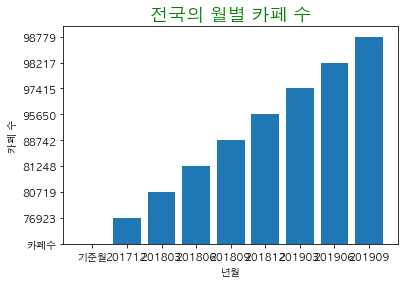

In [64]:
# Q12-1
import csv

f = open('cafe_2year.csv','r',encoding='utf-8')
lines = csv.reader(f)

list_data = []
for line in lines:
    list_data.append(line[:])
    
year_month =[]
caffe_num =[]
cnt=0
for data in list_data:
    if cnt%3 ==0:
        year_month.append(data[0])
        caffe_num.append(data[1])
    cnt+=1
    
plt.bar(year_month, caffe_num)

font1 = {'size':18,'color':'green'}
plt.title('전국의 월별 카페 수',fontdict=font1)
plt.xlabel('년월')
plt.ylabel('카페 수')

plt.show()

# print(list_data)
f.close()

In [68]:
# Q12-2
import csv

f = open('doctor_2019.csv','r',encoding='utf-8')
lines = csv.reader(f)

list_data = []
for line in lines:
    list_data.append(line[:])

cnt=0
doctor_cnt = {}
for data in list_data:
    if cnt==0:
        cnt+=1
        continue
    if data[0] in doctor_cnt:
        doctor_cnt[data[0]][0] += int(data[2])
        doctor_cnt[data[0]][1] += int(data[3])
        doctor_cnt[data[0]][2] += int(data[4])
        doctor_cnt[data[0]][3] += int(data[5])
    else:
        doctor_cnt[data[0]] = [0,0,0,0]
        
locate = ['서울','부산','대구','인천','대전','광주','울산']
print('지역  일반의  인턴 레지던트  전문의')

for key in locate:
    print("%s  %3d  %4d  %4d  %5d"%(key,doctor_cnt[key][0],doctor_cnt[key][1],doctor_cnt[key][2],doctor_cnt[key][3]))

f.close()

지역  일반의  인턴 레지던트  전문의
서울  156  1168  4620   9171
부산   56   173   689   2017
대구   22   138   503   1211
인천   46   116   376   1317
대전   24    90   254    705
광주   15    52   171    761
울산   18    23   104    446


In [71]:
# Q12-3
fw = open('doctor2.csv','w',encoding='utf-8')

fw.write('지역,일반의 수,인턴 수,레지던트 수,전문의 수\n')

for key in locate:
    fw.write(key+',')
    for i in range(len(doctor_cnt[key])):
        if i == len(doctor_cnt[key])-1:
            fw.write(str(doctor_cnt[key][i]))
        else:
            fw.write(str(doctor_cnt[key][i])+',')
    fw.write('\n')

fw.close()

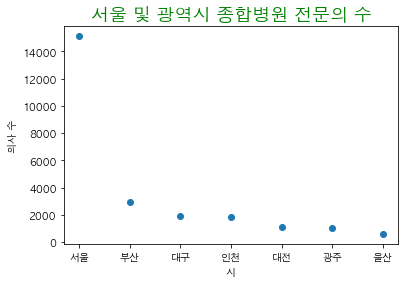

In [86]:
# Q12-4
import csv

f = open('doctor2.csv','r',encoding='utf-8')
lines = csv.reader(f)

list_data = []
for line in lines:
    list_data.append(line[:])

area = []
doctorNum = []

is_first = True
for data in list_data:
    if is_first == True:
        is_first = False
    else:
        area.append(data[0])
        doctorNum.append(int(data[1])+int(data[2])+int(data[3])+int(data[4]))

font1 = {'size':18,'color':'green'}
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=font1)
plt.scatter(area, doctorNum)
plt.xlabel('시')
plt.ylabel('의사 수')
plt.show()

f.close()

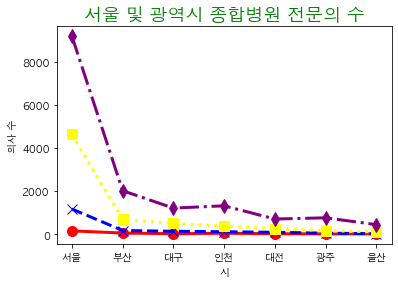

In [88]:
# Q12-5
import csv

f = open('doctor2.csv','r',encoding='utf-8')
lines = csv.reader(f)

list_data = []
for line in lines:
    list_data.append(line[:])

area = []
general = []
intern = []
resident = []
specialist = []

is_first = True
for data in list_data:
    if is_first == True:
        is_first = False
    else:
        area.append(data[0])
        general.append(int(data[1]))
        intern.append(int(data[2]))
        resident.append(int(data[3]))
        specialist.append(int(data[4]))

font1 = {'size':18,'color':'green'}
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=font1)
plt.plot(area,general, label='일반의', color='red', linestyle='-', marker='o', linewidth=3, markersize=10)
plt.plot(area,intern, label='인턴', color='blue', linestyle='--', marker='x', linewidth=3, markersize=10)
plt.plot(area,resident, label='레지던트', color='yellow', linestyle=':', marker='s', linewidth=3, markersize=10)
plt.plot(area,specialist, label='전문의', color='purple', linestyle='-.', marker='d', linewidth=3, markersize=10)

plt.xlabel('시')
plt.ylabel('의사 수')
plt.show()

f.close()

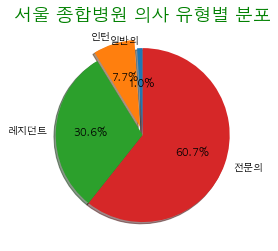

In [93]:
# Q12-6
import csv

f = open('doctor2.csv','r',encoding='utf-8')
lines = csv.reader(f)

list_data = []
for line in lines:
    list_data.append(line[:])
    
seoul_doctor = []
sum_of_seoul = 0
for data in list_data:
    if data[0] == '서울':
        seoul_doctor.append(int(data[1]))
        seoul_doctor.append(int(data[2]))
        seoul_doctor.append(int(data[3]))
        seoul_doctor.append(int(data[4]))
        sum_of_seoul = int(data[1])+int(data[2])+int(data[3])+int(data[4])
        
doctor_ratio = []
for num in seoul_doctor:
    doctor_ratio.append(num/sum_of_seoul*100)
    
# print(doctor_ratio)

doctor_kinds = ['일반의','인턴','레지던트','전문의']

font1 = {'size':18,'color':'green'}
plt.title('서울 종합병원 의사 유형별 분포',fontdict=font1)
plt.pie(doctor_ratio, explode=(0, 0.1, 0, 0), labels=doctor_kinds, autopct='%1.1f%%',shadow = True, startangle=90)

plt.show()

f.close()